# Homework 1: Sampling and Data Cleaning
## Topic: Text Analysis Using Twitter
## Due Date: Thursday, May 18, 11:59PM

**Full Name**: Johny Tarbouch 10033994

**Group members**: Qasim Sefaldeen 10033038, Anas Salameh 10040389

**IMPORTANT NOTE:** The first homework needs to be submitted individually.

## Grading

Grading is broken down into autograded answers and free response.

For autograded answers, the results of your code are compared to provided and/or hidden tests. **For autograded probability questions, the provided tests will only check that your answer is within a reasonable range.**


### Please make sure to save regularly; do not rely on autosave to save your work for you!

## Scoring Breakdown

|Question|Points|
|---|---|
1a | 1
1b | 1
1c | 3
1d | 1
2a | 2
2b | 2
2c | 2
2d | 2
2f | 1
3a | 1
3b | 1
3c | 1
4b | 1
4ci | 1
4cii | 1
4d | 1
4e | 2
4f | 2
**Total** | **26**

## This Assignment

Welcome to the first homework assignment of Data Science Foundation! In this assignment, we will be exploring tweets from several high profile Twitter users.  

In this assignment you will gain practice with:
* Conducting Data Cleaning and EDA on a text-based dataset.
* Manipulating data in pandas with the datetime and string accessors.
* Writing regular expressions and using pandas regex methods.
* Performing sentiment analysis on social media using VADER.


In [144]:
# Run this cell to set up your notebook.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from ds100_utils import *

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets.
pd.set_option('max_colwidth', 280)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")

def horiz_concat_df(dict_of_df, head=None):
    """
    Horizontally concatenante multiple DataFrames for easier visualization. 
    Each DataFrame must have the same columns.
    """
    df = pd.concat([df.reset_index(drop=True) for df in dict_of_df.values()], axis=1, keys=dict_of_df.keys())
    if head is None:
        return df
    return df.head(head)

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Question 1: Importing the Data


The data for this assignment was obtained using the [Twitter APIs](https://developer.twitter.com/en/docs/twitter-api).  To ensure that everyone has the same data and to eliminate the need for every student to apply for a Twitter developer account, we have collected a sample of tweets from several high-profile public figures.  The data is stored in the folder `data`.  Run the following cell to list the contents of the directory:

In [145]:
# Run this cell to list the content, no further action is needed.
from os import listdir
for f in listdir("data"):
    print(f)

AOC_recent_tweets.txt
BernieSanders_recent_tweets.txt
BillGates_recent_tweets.txt
Cristiano_recent_tweets.txt
elonmusk_recent_tweets.txt
EmmanuelMacron_recent_tweets.txt


<br><br>

--- 
### Question 1a

Let's examine the contents of one of these files.  Using the [`open` function](https://docs.python.org/3/library/functions.html#open) and [`read` operation](https://docs.python.org/3/tutorial/inputoutput.html#methods-of-file-objects) on a python file object, read the first 1000 **characters** in `data/BernieSanders_recent_tweets.txt` and store your result in the variable `q1a`.  Then display the result so you can read it.

**Caution:** Viewing the contents of large files in a Jupyter notebook could crash your browser.  Be careful not to print the entire contents of the file.

**Hint1:** You might want to try to use `with`:

```python
with open("filename", "r") as f:
    f.read(2)
```
**Hint2:** Your datapath should start with `data/...`, absolute path will not be accepted.


In [146]:
with open("data/BernieSanders_recent_tweets.txt", "r") as f:
    q1a = f.read(1000)
print(q1a)

[{"created_at": "Sat Feb 06 22:43:03 +0000 2021", "id": 1358184460794163202, "id_str": "1358184460794163202", "full_text": "Why would we want to impeach and convict Donald Trump \u2013 a president who is now out of office? Because it must be made clear that no president, now or in the future, can lead an insurrection against the government he or she is sworn to protect.", "truncated": false, "display_text_range": [0, 243], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": []}, "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>", "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 216776631, "id_str": "216776631", "name": "Bernie Sanders", "screen_name": "BernieSanders", "location": "Vermont", "description": "U.S. Senator for Vermont. Not me, us.", "url": "https://t.co/jpg8Sp1GhR", "entities": {"

In [147]:
assert len(q1a) == 1000
assert q1a.startswith("[{\"created_at\":")
assert "\"user\": {\"id\": 216776631" in q1a

<br><br>

--- 
### Question 1b

What format is the data in? Answer this question by entering the letter corresponding to the right format in the variable `q1b` below.

**Caution:** Viewing the contents of large files in a Jupyter notebook could crash your browser.  Be careful not to print the entire contents of the file.

  **A.** CSV<br/>
  **B.** HTML<br/>
  **C.** JavaScript Object Notation (JSON)<br/>
  **D.** Excel XML

Answer in the following cell. Your answer should be a string, either `"A"`, `"B"`, `"C"`, or `"D"`.


In [148]:
q1b = "C"

In [149]:
assert q1b.upper() in ["A", "B", "C", "D"]

<br><br>

--- 

### Question 1c

Pandas has built-in readers for many different file formats including the file format used here to store tweets.  To learn more about these, check out the documentation for `pd.read_csv` [(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), `pd.read_html`[(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html), `pd.read_json`[(docs)](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html), and `pd.read_excel`[(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html).  

1. Use one of these functions to populate the `tweets` dictionary with the tweets for: `AOC`, `Cristiano`, and `elonmusk`. The keys of `tweets` should be the handles of the users, which we have provided in this cell, and the values should be the DataFrames.
2. Set the index of each DataFrame to correspond to the `id` of each tweet.  



**Hint:** You might want to first try loading one of the DataFrames before trying to complete the entire question.


In [150]:
tweets = {}

aoc_df = pd.read_json('data/AOC_recent_tweets.txt')
aoc_df.set_index('id', inplace=True)
tweets['AOC'] = aoc_df

cristiano_df = pd.read_json('data/Cristiano_recent_tweets.txt')
cristiano_df.set_index('id', inplace=True)
tweets['Cristiano'] = cristiano_df

elonmusk_df = pd.read_json('data/elonmusk_recent_tweets.txt')
elonmusk_df.set_index('id', inplace=True)
tweets['elonmusk'] = elonmusk_df


dict_keys(['AOC', 'Cristiano', 'elonmusk'])

In [151]:
assert len(tweets.keys()) == 3
assert set(tweets.keys()) == {"AOC", "Cristiano", "elonmusk"}
assert all(df.index.name == "id" for df in tweets.values())
assert (tweets["AOC"].shape[0] is not None) and (tweets["AOC"].shape[0] >= 30)
assert (tweets["Cristiano"].shape[0] is not None) and (tweets["Cristiano"].shape[0] >= 30)
assert (tweets["elonmusk"].shape[0] is not None) and (tweets["elonmusk"].shape[0] >= 30)

If you did everything correctly, the following cells will show you the first 5 tweets for Elon Musk (and a lot of information about those tweets).

In [152]:
# Run this cell to show the first 5 tweets for Elon Musk, no further action is needed.
tweets["elonmusk"].head()

,created_at,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
id,,,,,,,,,,,,,,,,,,,,,
1357991946082418690,2021-02-06 09:58:04+00:00,1357991946082418688,The Second Last Kingdom https://t.co/Je4EI88HmV,False,"[0, 23]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1357991942471094275, 'id_str': '1357991942471094275', 'indices': [24, 47], 'media_url': 'http://pbs.twimg.com/media/EtiOegrVEAMCgZE.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtiOegrV...","{'media': [{'id': 1357991942471094275, 'id_str': '1357991942471094275', 'indices': [24, 47], 'media_url': 'http://pbs.twimg.com/media/EtiOegrVEAMCgZE.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtiOegrVEAMCgZE.jpg', 'url': 'https://t.co/Je4EI88HmV', 'display_url': '...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,...,352096,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
1357973565413367808,2021-02-06 08:45:02+00:00,1357973565413367808,@DumDin7 @Grimezsz Haven’t heard that name in years …,False,"[19, 53]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'DumDin7', 'name': 'Dum Din', 'id': 1279896279733145601, 'id_str': '1279896279733145601', 'indices': [0, 8]}, {'screen_name': 'Grimezsz', 'name': '𝑪𝒍𝒂𝒊𝒓𝒆 𝒅𝒆 𝑳𝒖𝒏𝒆࿎', 'id': 276540738, 'id_str': '276540738', 'indi...",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.357973e+18,1.357973e+18,...,2155,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
1357972904663687173,2021-02-06 08:42:25+00:00,1357972904663687168,@Grimezsz Dogecake,False,"[10, 18]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Grimezsz', 'name': '𝑪𝒍𝒂𝒊𝒓𝒆 𝒅𝒆 𝑳𝒖𝒏𝒆࿎', 'id': 276540738, 'id_str': '276540738', 'indices': [0, 9]}], 'urls': []}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.357835e+18,1.357835e+18,...,5373,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
1357970517165182979,2021-02-06 08:32:55+00:00,1357970517165182976,YOLT\n\nhttps://t.co/cnOf9yjpF1,False,"[0, 29]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/cnOf9yjpF1', 'expanded_url': 'https://m.youtube.com/watch?v=05QJlF06F4s', 'display_url': 'm.youtube.com/watch?v=05QJlF…', 'indices': [6, 29]}]}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,...,62717,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
1357964347813687296,2021-02-06 08:08:24+00:00,1357964347813687296,@Kristennetten That’s Damian,False,"[15, 28]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Kristennetten', 'name': 'K10✨', 'id': 985686123123949568, 'id_str': '985686123123949568', 'indices': [0, 14]}], 'urls': []}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.357964e+18,1.357964e+18,...,5726,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN


<!-- BEGIN QUESTION -->

<br><br>

---
### Question 1d
There are many ways we could choose to read tweets. Why might someone be interested in doing data analysis on tweets? Name a kind of person or institution which might be interested in this kind of analysis. Then, give two reasons why a data analysis of tweets might be interesting or useful for them. Answer in 2-3 sentences.


In [153]:


YOUR_ANSWER_1d = "Politicians: they could predict the result of the elections. They will know how the people think about them, and about their plans"


print(YOUR_ANSWER_1d)

Politicians: they could predict the result of the elections. They will know how the people think about them, and about their plans


In [154]:
assert YOUR_ANSWER_1d != "_Type your answer here, replacing this text._"

<!-- END QUESTION -->

<br/><br/><br/>

<hr style="border: 1px solid #fdb515;" />


## Question 2:  Source Analysis


In some cases, the Twitter feed of a public figure may be partially managed by a public relations firm. In these cases, the device used to post the tweet may help reveal whether it was the individual (e.g., from an iPhone) or a public relations firm (e.g., TweetDeck).  The tweets we have collected contain the source information but it is formatted strangely :(

In [155]:
# Run this cell to see the source column of Cristinao's tweet dataframe, no futher action is needed.
tweets["Cristiano"][["source"]]

,source
id,
1358137564587319299,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1357379984399212545,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1356733030962987008,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1355924395064233986,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1355599316300292097,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
...,...
32514882561638401,"<a href=""http://www.whosay.com"" rel=""nofollow"">WhoSay</a>"
32513604662071296,"<a href=""http://www.whosay.com"" rel=""nofollow"">WhoSay</a>"
32511823722840064,"<a href=""http://www.whosay.com"" rel=""nofollow"">WhoSay</a>"


In this question we will use a regular expression to convert this messy HTML snippet into something more readable.  For example: `<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>` should be `Twitter for iPhone`. 


<br><br>

--- 
### Question 2a

We will first use the Python `re` library to cleanup the above test string.  In the cell below, write a regular expression that will match the **HTML tag** and assign it to the variable `q2a_pattern`. We then use the `re.sub` function to substitute anything that matches the pattern with an empty string `""`.

An HTML tag is defined as a `<` character followed by zero or more non-`>` characters, followed by a `>` character. That is, `<a>` and `</a>` are both considered _separate_ HTML tags.


In [156]:
q2a_pattern = '<.*?>'


test_str = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
re.sub(q2a_pattern, "", test_str)

'Twitter for iPhone'

In [157]:
assert re.sub(q2a_pattern, "", '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>') == 'Twitter for iPhone'

<br><br>

--- 
### Question 2b

Rather than writing a regular expression to detect and remove the HTML tags we could instead write a regular expression to **capture** the device name between the angle brackets.  To simplify the problem, you may assume the device name is between a right angle bracket and a left angle bracket. Here we will use [**capturing groups**](https://docs.python.org/3/howto/regex.html#grouping) by placing parenthesis around the part of the regular expression we want to return..  


**Hint:** The output of the following cell should be `['Twitter for iPhone']`.


In [158]:
q2b_pattern = '>([^<>]+)</a>'
test_str = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
re.findall(q2b_pattern, test_str)

['Twitter for iPhone']

In [159]:
assert re.findall(q2b_pattern, '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>') == ['Twitter for iPhone']

<br><br>

---
### Question 2c

Using either of the two regular expressions you just created and `Series.str.replace`[(docs)](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html) or `Series.str.extract`[(docs)](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html), add a new column called `"device"` to **all** of the DataFrames in `tweets` containing just the text describing the device (without the HTML tags). You may use one or multiple lines.

**Note:** You do not need to follow the provided skeleton code. You may also find `DataFrame.assign` helpful, see the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html), but it is not required.

In [160]:
for handle, df in tweets.items():
    df['device'] = df['source'].str.extract(q2b_pattern)
    
# tweets["AOC"].head(3)
# tweets["AOC"]['device'].head(3)

In [161]:
assert 'device' in tweets['Cristiano'].columns
assert 'device' in tweets['AOC'].columns
assert 'device' in tweets['elonmusk'].columns

<br><br>

---
### Question 2d

To examine the most frequently used devices by each individual, implement the `most_freq` function that takes in a `Series` and returns a new `Series` containing the `k` most commonly occurring entries in the first series, where the values are the counts of the entries and the indices are the entries themselves.

For example: 
```python
most_freq(pd.Series(["A", "B", "A", "C", "B", "A"]), k=2)
```
would return:
```
A    3
B    2
dtype: int64
```




**Hint**: Consider using `value_counts`, `sort_values`, `head`, and/or `nlargest` (for the last one, read the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nlargest.html?highlight=nlargest)).
 Think of what might be the most efficient implementation.

In [162]:
def most_freq(series, k = 5):
    counts = series.value_counts().head(k)

    return pd.Series(counts.values, index= counts.index)

In [163]:
assert len(most_freq(tweets["Cristiano"]['device'])) == 5

Run the following two cells to compute a table and plot describing the top 5 most commonly used devices for each user.

In [164]:
# Run this cell to compute a table, no further action needed.
device_counts = pd.DataFrame(
    [most_freq(tweets[name]['device']).rename(name)
     for name in tweets]
).fillna(0)
device_counts

device,Twitter for iPhone,Twitter Media Studio,Twitter Web Client,WhoSay,MobioINsider.com,Twitter for Android,Twitter Web App
AOC,3245.0,2.0,0.0,0.0,0.0,0.0,0.0
Cristiano,1183.0,0.0,959.0,453.0,144.0,108.0,0.0
elonmusk,3202.0,0.0,0.0,0.0,0.0,0.0,37.0


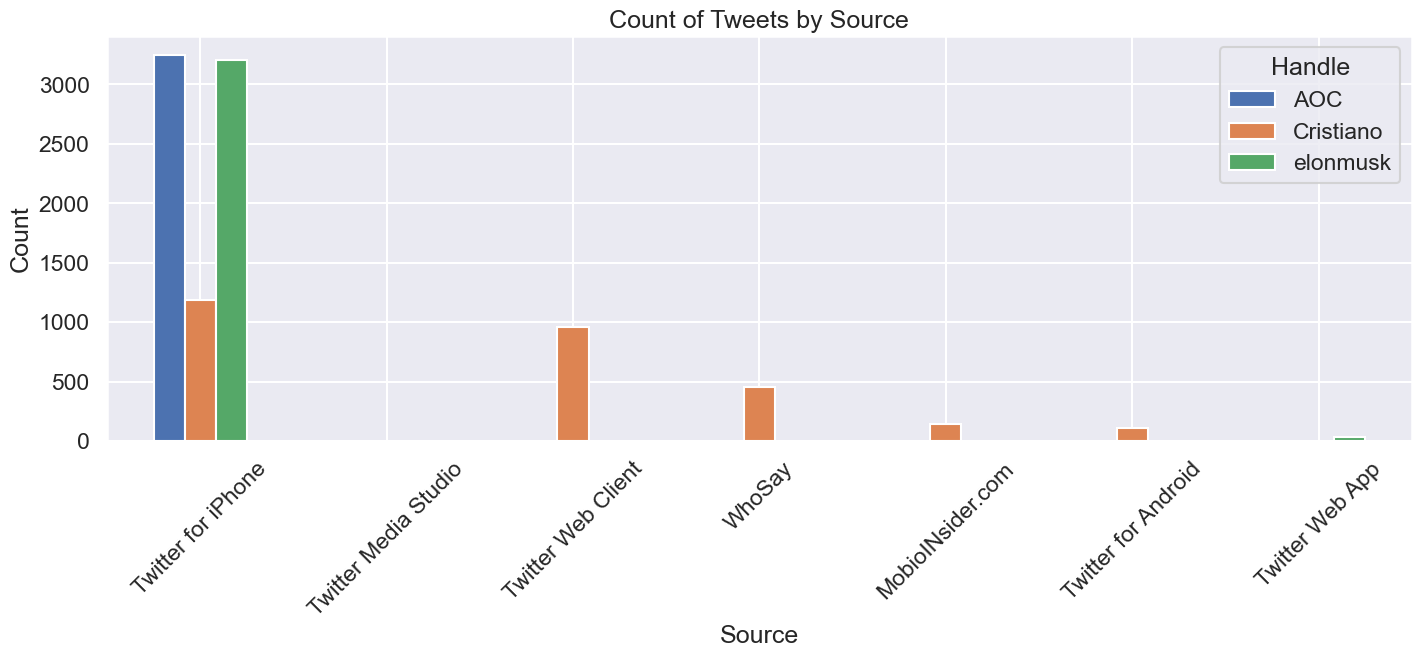

In [165]:
# Run this cell to generate the plot, no further action needed.
make_bar_plot(device_counts.T, title="Count of Tweets by Source",
               xlabel="Source", ylabel="Count")
plt.xticks(rotation=45)
plt.legend(title="Handle");

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

---
### Question 2f

We just looked at the top 5 most commonly used devices for each user. However, we used the number of tweets as a measure, when it might be better to compare these distributions by comparing _proportions_ of tweets. Why might proportions of tweets be better measures than numbers of tweets?


In [166]:
YOUR_ANSWER_2f = "if we use proportion it help us describes the frequency at which values of a variable occur, values will be accounted for once, and only once, and we will end up with frequencies add up to 100%"

In [167]:
assert YOUR_ANSWER_2f != "_Type your answer here, replacing this text._"

<!-- END QUESTION -->

<br/><br/><br/>

<hr style="border: 1px solid #fdb515;" />


## Question 3: When?

Now that we've explored the sources of each of the tweets, we will perform some time series analysis. A look into the temporal aspect of the data could reveal insights about how a user spends their day, when they eat and sleep, etc. In this question, we will focus on the time at which each tweet was posted.


<br><br>

---
### Question 3a

Complete the following function `add_hour` that takes in a tweets dataframe `df`, and two column names `time_col` and `result_col`. Your function should use the timestamps in the `time_col` column to store in a new column `result_col` the computed  hour of the day as a floating point number according to the formula:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^{2}}
$$

**Note:** The below code calls your `add_hour` function and updates each tweets dataframe by using the `created_at` timestamp column to calculate and store the `hour` column.

**Hint:** See the following link for an example of working with timestamps using the [`dt` accessors](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dt-accessor). 


In [168]:
def add_hour(df, time_col, result_col):
    df[result_col] = df[time_col].dt.hour + df[time_col].dt.minute / 60 + df[time_col].dt.second / 3600
    return df
# print(tweets["AOC"]["created_at"])
# Do not modify the below code.
tweets = {handle: add_hour(df, "created_at", "hour") for handle, df in tweets.items()}
tweets["AOC"]["hour"].head()

id
1358149122264563712    20.377222
1358147616400408576    20.277500
1358145332316667909    20.126389
1358145218407759875    20.118611
1358144207333036040    20.051667
Name: hour, dtype: float64

In [169]:
assert all("hour" in df.columns for df in tweets.values())
assert all(0 <= df["hour"].min() and 24 >= df["hour"].max() for df in tweets.values())

With our new `hour` column, let's take a look at the distribution of tweets for each user by time of day. The following cell helps create a density plot on the number of tweets based on the hour they are posted. 

The function `bin_df` takes in a dataframe, an array of bins, and a column name; it bins the the values in the specified column, returning a dataframe with the bin lower bound and the number of elements in the bin. This function uses [`pd.cut`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html), a pandas [utility](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) for binning numerical values that you may find helpful in the distant future.

Run the cell and answer the following question about the plot.

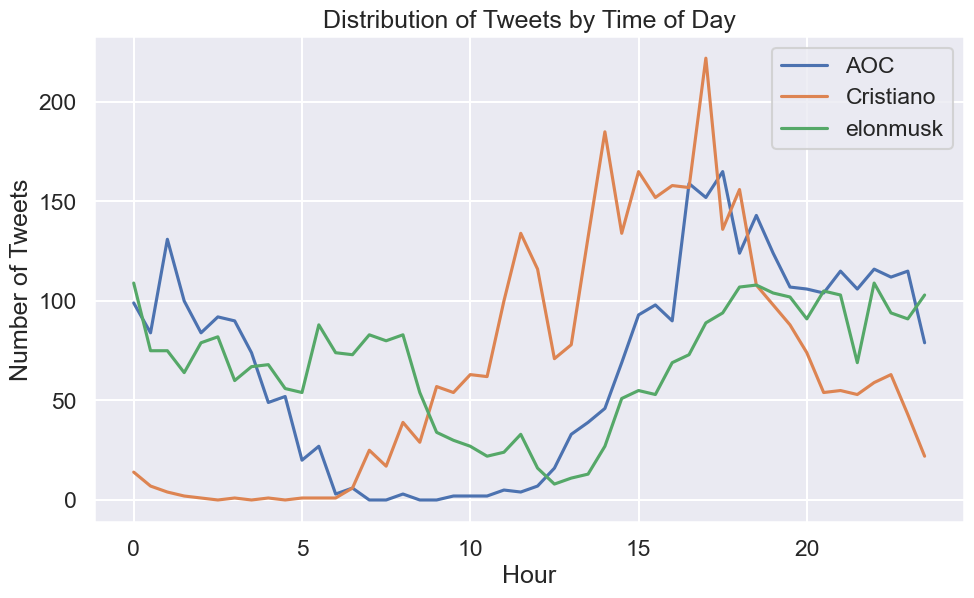

In [170]:
# Run this cell to genertae the plot, no further action is needed.
def bin_df(df, bins, colname):
    binned = pd.cut(df[colname], bins).value_counts().sort_index()
    return pd.DataFrame({"counts": binned, "bin": bins[:-1]})

hour_bins = np.arange(0, 24.5, .5)
binned_hours = {handle: bin_df(df, hour_bins, "hour") for handle, df in tweets.items()}

make_line_plot(binned_hours, "bin", "counts", title="Distribution of Tweets by Time of Day",
               xlabel="Hour", ylabel="Number of Tweets")

<!-- BEGIN QUESTION -->

<br><br>

---
### Question 3b
Compare Cristiano's distribution with those of AOC and Elon Musk. In particular, compare the distributions before and after Hour 6. What differences did you notice? What might be a possible cause of that? Do the data plotted above seem reasonable?

In [171]:
YOUR_ANSWER_3b = "We need to consider the time zone, dayly rotine, and when they prefer to tweet. We can see that cristiano is less active bevor 6, more aktive in the afternoon same with elon and AOC. Is it reasonable: i think its not -> depend on the context and the character of the person, and it could be a external factors to, most importent is that musk lives in the US but ronaldo in EU."
print(YOUR_ANSWER_3b)

We need to consider the time zone, dayly rotine, and when they prefer to tweet. We can see that cristiano is less active bevor 6, more aktive in the afternoon same with elon and AOC. Is it reasonable: i think its not -> depend on the context and the character of the person, and it could be a external factors to, most importent is that musk lives in the US but ronaldo in EU.


In [172]:
assert YOUR_ANSWER_3b != "_Type your answer here, replacing this text._"

<!-- END QUESTION -->

<br><br>

---
### Question 3c

To account for different locations of each user in our analysis, we will next adjust the `created_at` timestamp for each tweet to the respective timezone of each user. Complete the following function `convert_timezone` that takes in a tweets dataframe `df` and a timezone `new_tz` and adds a new column `converted_time` that has the adjusted `created_at` timestamp for each tweet. The timezone for each user is provided in `timezones`.

**Hint:** Again, please see the following link for an example of working with [`dt` accessors](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dt-accessor).


In [173]:
'''def convert_timezone(df, new_tz):
    # .dt.tz_localize("UTC").dt.tz_convert("US/Eastern")
    df["converted_time"] = df['created_at'].dt.tz_convert(new_tz)
    return df'''


def convert_timezone(df, new_tz):
    df['converted_time'] = df.apply(lambda row: row['created_at'].astimezone(pd.Series.timezone(timezones[row['created_at']])) if row['created_at'] in timezones else row['created_at'], axis=1)
    df['converted_time'] = df['converted_time'].dt.tz_convert(pytz.timezone(new_tz))
    return df

timezones = {"AOC": "EST", "Cristiano": "Europe/Lisbon", "elonmusk": "America/Los_Angeles"}

tweets = {handle: convert_timezone(df, tz) for (handle, df), tz in zip(tweets.items(), timezones.values())}

print(tweets['AOC']['converted_time'])

id
1358149122264563712   2021-02-06 15:22:38-05:00
1358147616400408576   2021-02-06 15:16:39-05:00
1358145332316667909   2021-02-06 15:07:35-05:00
1358145218407759875   2021-02-06 15:07:07-05:00
1358144207333036040   2021-02-06 15:03:06-05:00
                                 ...           
1181935928249606146   2019-10-09 09:14:19-05:00
1181932554552827905   2019-10-09 09:00:54-05:00
1181932460516478976   2019-10-09 09:00:32-05:00
1181927615340453899   2019-10-09 08:41:17-05:00
1181804625588051968   2019-10-09 00:32:34-05:00
Name: converted_time, Length: 3247, dtype: datetime64[ns, EST]


In [174]:
all("converted_time" in df.columns for df in tweets.values())
assert all((df["converted_time"] == df["created_at"]).all() for df in tweets.values())
assert all(df["converted_time"].dt.tz != df["created_at"].dt.tz for df in tweets.values())

With our adjusted timestamps for each user based on their timezone, let's take a look again at the distribution of tweets by time of day.

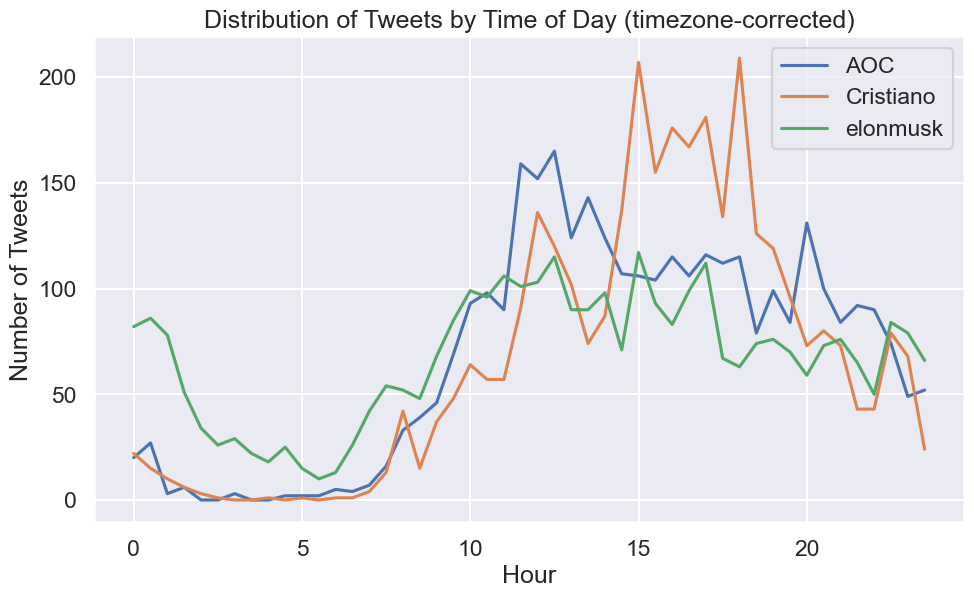

In [175]:
# Run this cell to generate the plot, no further action is needed.
tweets = {handle: add_hour(df, "converted_time", "converted_hour") for handle, df in tweets.items()}
binned_hours = {handle: bin_df(df, hour_bins, "converted_hour") for handle, df in tweets.items()}

make_line_plot(binned_hours, "bin", "counts", title="Distribution of Tweets by Time of Day (timezone-corrected)",
               xlabel="Hour", ylabel="Number of Tweets")

<br/><br/><br/>

<hr style="border: 1px solid #fdb515;" />


## Question 4: Sentiment Analysis


In the past few questions, we have explored the sources of the tweets and when they are posted. Although on their own, they might not seem particularly intricate, combined with the power of regular expressions, they could actually help us infer a lot about the users. In this section, we will continue building on our past analysis and specifically look at the **sentiment of each tweet** -- this would lead us to a much more direct and detailed understanding of how users view certain subjects and people. **Sentiment analysis** is generally the computational task of classifying the emotions in a body of text as positively or negatively charged.

<br/>
How do we actually measure the sentiment of each tweet? In our case, we can use the words in the text of a tweet for our calculation! For example, the word "love" within the sentence "I love America!" has a positive sentiment, whereas the word "hate" within the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon ([github](https://github.com/cjhutto/vaderSentiment), [original paper](https://doi.org/10.1609/icwsm.v8i1.14550)) to analyze the sentiment of AOC's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.
VADER relies on humans to stabilize its scoring. The creators use Amazon Mechanical Turk, a crowdsourcing survey platform, to train its model. Its training data consists of a small corpus of tweets, New York Times editorials and news articles, Rotten Tomatoes reviews, and Amazon product reviews, tokenized using the natural language toolkit (NLTK).

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [176]:
# Run this cell to print the first 10 rows, no further action needed.
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



As you can see, the lexicon contains emojis too! Each row contains a word ("token") and various measures of the **polarity** of that word, measuring how positive or negative the word is, on a scale of -4 (extremely negative) to +4 (extremely positive). We explain more below.

<br><br>

---
### Question 4b

Let's first load in the data containing all the sentiments. 
In `vader_lexicon.txt`, each row contains the word (token), average polarity, standard deviation of polarity, and the "raw polarity ratings" of each of the 10 human raters.

Read `vader_lexicon.txt` into a new dataframe called `sent`. The index of the dataframe should be the words in the lexicon and should be named `token`. `sent` should have one column named `polarity`, storing the average polarity of each word. We will not incorporate the polarity standard deviation and raw ratings for this exercise.

**Hint1:** The `pd.read_csv` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)) function may help here. 

**Hint2:** Since the file is tab-separated, be sure to read the documentation on how to set the separator with `pd.read_csv`'s parameter `sep`. To check you work, the first token should be `$:`.

**Hint3:** Is there a header (that is, data that can be used as column names) in the csv file and how can you account for this?


In [177]:
sent = pd.read_csv('vader_lexicon.txt', sep='\t', header=None, usecols=[0, 1], names=['token', 'polarity'], index_col=0)
sent.head()

'''sent = pd.read_csv('vader_lexicon.txt', sep='\t', header=None, usecols=[0, 1], index_col=0)
sent = sent[[1]]
sent.columns = ['polarity']
sent.index.name = 'token'
sent.head()'''

"sent = pd.read_csv('vader_lexicon.txt', sep='\t', header=None, usecols=[0, 1], index_col=0)\nsent = sent[[1]]\nsent.columns = ['polarity']\nsent.index.name = 'token'\nsent.head()"

In [178]:
assert sent.shape == (7517, 1)


<br><br>

---
### Question 4c

Before further analysis, we will need some more tools that can help us extract the necessary information and clean our data.

Complete the following regular expressions that will help us match part of a tweet that we either (i) want to remove or (ii) are interested in learning more about.

#### **Question 4c Part i**
Assign a regular expression to a new variable `punct_re` that captures all of the punctuations within a tweet. We consider punctuation to be any non-word, non-whitespace character.

**Note**: A word character is any character that is alphanumeric or an underscore. A whitespace character is any character that is a space, a tab, a new line, or a carriage return.


In [179]:
punct_re = '[\W_]'

re.sub(punct_re, " ", tweets["AOC"].iloc[0]["full_text"])

'RT  RepEscobar  Our country has the moral obligation and responsibility to reunite every single family separated at the southern border   T '

In [180]:
assert isinstance(punct_re, str)
assert re.sub(punct_re, " ", "a.b.c.1!2?3") == 'a b c 1 2 3'
assert re.sub(punct_re, " ", "<a href='https://google.com'>Google</a>") == ' a href  https   google com  Google  a '

#### **Question 4c Part ii**
Assign a regular expression to a new variable `mentions_re` that matches any mention in a tweet. Your regular expression should use a capturing group to extract the user's username in a mention.

**Hint**: a user mention within a tweet always starts with the `@` symbol and is followed by a series of word characters (with no space in between). For more explanations on what a word character is, check out the **Note** section in Part 1.


In [181]:
mentions_re = '@(\w+)'
#print(re.findall(mentions_re, "@someone: this regex stuff is cool @dsa"))
re.findall(mentions_re, tweets["AOC"].iloc[0]["full_text"])

['RepEscobar']

In [182]:
assert mentions_re != ''
assert re.findall(mentions_re, "@someone: this regex stuff is cool") == ['someone']

<br/>

### Tweet Sentiments and User Mentions

As you have seen in the previous part of this question, there are actually a lot of interesting components that we can extract out of a tweet for further analysis! For the rest of this question though, we will focus on one particular case: the sentiment of each tweet in relation to the users mentioned within it. 

To calculate the sentiments for a sentence, we will follow this procedure:

1. Remove the punctuation from each tweet so we can analyze the words.
2. For each tweet, find the sentiment of each word.
3. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

<br><br>

---
### Question 4d

Let's use our `punct_re` regular expression from the previous part to clean up the text a bit more! The goal here is to remove all of the punctuations to ensure words can be properly matched with those from VADER to actually calculate the full sentiment score.

Complete the following function `sanitize_texts` that takes in a table `df` and adds a new column `clean_text` by converting all characters in its original `full_text` column to lower case and replace all instances of punctuations with a space character.


In [183]:
tweets["AOC"]["full_text"].head()

id
1358149122264563712                                                                                       RT @RepEscobar: Our country has the moral obligation and responsibility to reunite every single family separated at the southern border.\n\nT…
1358147616400408576                                                                                      RT @RoKhanna: What happens when we guarantee $15/hour?\n\n💰 31% of Black workers and 26% of Latinx workers get raises.\n😷 A majority of essent…
1358145332316667909                                                                                                                                                                                                    (Source: https://t.co/3o5JEr6zpd)
1358145218407759875                                                 Joe Cunningham pledged to never take corporate PAC money, and he never did. Mace said she’ll cash every check she gets. Yet another way this is a downgrade. https://t.co/DytsQXKXgU
1

In [184]:
def sanitize_texts(df):
    df['clean_text'] = df['full_text'].str.lower().apply(lambda text: re.sub(punct_re, ' ', text))
    return df

'''def sanitize_texts(df):
    df['clean_text'] = df['full_text'].str.lower()
    df['clean_text'] = df['clean_text'].str.replace(punct_re, ' ', regex=True) #regex=True
    return df'''

tweets = {handle: sanitize_texts(df) for handle, df in tweets.items()}
tweets["AOC"]["clean_text"].head()


id
1358149122264563712                                                                                     rt  repescobar  our country has the moral obligation and responsibility to reunite every single family separated at the southern border   t 
1358147616400408576                                                                                     rt  rokhanna  what happens when we guarantee  15 hour     31  of black workers and 26  of latinx workers get raises    a majority of essent 
1358145332316667909                                                                                                                                                                                                 source  https   t co 3o5jer6zpd 
1358145218407759875                                             joe cunningham pledged to never take corporate pac money  and he never did  mace said she ll cash every check she gets  yet another way this is a downgrade  https   t co dytsqxkxgu
13581442073330360

In [185]:
assert 'clean_text' in tweets["AOC"].columns
df = pd.DataFrame({"full_text": ["a clean tweet", "an UPPPERcAsE tweet", "a ! tweet!!with..(*UF)punctuation"]})
df = sanitize_texts(df)
assert df["clean_text"].tolist() == ['a clean tweet', 'an upppercase tweet', 'a   tweet  with    uf punctuation']
assert all("clean_text" in df.columns for df in tweets.values())

In [186]:
tweets['AOC']['full_text']

id
1358149122264563712                                                                                                                                             RT @RepEscobar: Our country has the moral obligation and responsibility to reunite every single family separated at the southern border.\n\nT…
1358147616400408576                                                                                                                                            RT @RoKhanna: What happens when we guarantee $15/hour?\n\n💰 31% of Black workers and 26% of Latinx workers get raises.\n😷 A majority of essent…
1358145332316667909                                                                                                                                                                                                                                                          (Source: https://t.co/3o5JEr6zpd)
1358145218407759875                                                                     

<br><br>

---
### Question 4e
With the texts sanitized, we can now extract all the user mentions from tweets. 

Complete the following function `extract_mentions` that takes in the **`full_text`** (not `clean_text`!) column from a tweets dataframe  and uses `mentions_re` to extract all the mentions in a dataframe. The returned dataframe is:
* single-indexed by the IDs of the tweets
* has one row for each mention
* has one column named `mentions`, which contains each mention in all lower-cased characters


**Note:** While staff solution contains a single line, you may find it helpful to break the problem into multiple subparts and complete this in multiple lines.

**Hints**: There are several ways to approach this problem.
* Here is a list of documentations for potentially useful function. You are not expected to use all of them, you may also need additional functions that are not listed below.
    * Extracting valid mentions: `str.extractall` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extractall.html?highlight=extractall)), `str.findall` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.findall.html)), `dropna` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html))
    * Refomatting data: `.reset_index` ([link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)), `.explode` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.explode.html)), `.to_frame`([link](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html)).
    * You can find an example of how to chain `.explode` and `.to_frame` in the *Tidying Up the Data* section following this question.
* The staff solution uses a single line of chained methods, but you are encouraged to break the problem into subparts with multiple lines.

In [187]:
def extract_mentions(full_texts):
    mentions = full_texts.str.findall(mentions_re)
    mentions = mentions.explode()
    mentions = mentions.str.lower()
    mentions = mentions.dropna()
    mentions = mentions.to_frame(name='mentions')
    return mentions[['mentions']]

# Uncomment this line to help you debug.
display(extract_mentions(tweets["AOC"]["full_text"]).head())

# Do not modify the below code.
mentions = {handle: extract_mentions(df["full_text"]) for handle, df in tweets.items()}
horiz_concat_df(mentions).head()
# tweets["AOC"]["mentions"] 

,mentions
id,
1358149122264563712,repescobar
1358147616400408576,rokhanna
1358130063963811840,jaketapper
1358130063963811840,repnancymace
1358130063963811840,aoc


,AOC,Cristiano,elonmusk
,mentions,mentions,mentions
0,repescobar,sixpadhomegym,dumdin7
1,rokhanna,globe_soccer,grimezsz
2,jaketapper,pestanacr7,grimezsz
3,repnancymace,goldenfootofficial,kristennetten
4,aoc,herbalife,kristennetten


In [188]:
assert list(extract_mentions(tweets["AOC"]["full_text"]).columns) == ['mentions']
assert list(extract_mentions(tweets["Cristiano"]["full_text"]).columns) == ['mentions']
assert list(extract_mentions(tweets["elonmusk"]["full_text"]).columns) == ['mentions']
assert all(not isinstance(df.index, pd.MultiIndex) for df in mentions.values())
assert all(set(df.columns) == {"mentions"} for df in mentions.values())
assert all(not df.isnull().values.any() for df in mentions.values())
assert set(mentions.keys()) == {"AOC", "Cristiano", "elonmusk"}
horiz_mentions = horiz_concat_df(mentions)
assert horiz_mentions.loc[0]["AOC"]["mentions"] == 'repescobar'
horiz_mentions = horiz_concat_df(mentions)
assert list(sorted(horiz_mentions.columns)) == [('AOC', 'mentions'), ('Cristiano', 'mentions'), ('elonmusk', 'mentions')]

<br/>

### Tidying Up the Data

Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. The `to_tidy_format` function implemented for you uses the `clean_text` column of each tweets dataframe to create a tidy table, which is:

* single-indexed by the IDs of the tweets, for every word in the tweet.
* has one column named `word`, which contains the individual words of each tweet.

Run the following cell to convert the table into the tidy format. Take a look at the first 5 rows from the "tidied" tweets dataframe for AOC and see if you can find out how the structure has changed.

**Note**: Although there is no work needed on your part, we have referenced a few more advanced pandas methods you might have not seen before -- you should definitely look them up in the documentation when you have a chance, as they are quite powerful in restructuring a dataframe into a useful intermediate state!

In [189]:
# Run this cell to convert table into tidy format, no further action is needed.
def to_tidy_format(df):
    tidy = (
        df["clean_text"]
        .str.split()
        .explode()
        .to_frame()
        .rename(columns={"clean_text": "word"})
    )
    return tidy

tidy_tweets = {handle: to_tidy_format(df) for handle, df in tweets.items()}
tidy_tweets["AOC"].head()

,word
id,
1358149122264563712,rt
1358149122264563712,repescobar
1358149122264563712,our
1358149122264563712,country
1358149122264563712,has


### Adding in the Polarity Score

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

The following `add_polarity` function adds a new `polarity` column to the `df` table. The `polarity` column contains the sum of the sentiment polarity of each word in the text of the tweet.

**Note**: Again, though there is no work needed on your part, it is important for you to go through how we set up this method and actually understand what each method is doing. In particular, see how we deal with missing data.

In [190]:
# Just run this cell to add the "polarity" column.
# No further code is needed, but verify your understanding of each chained method.
def add_polarity(df, tidy_df):
    df["polarity"] = (
        tidy_df
        .merge(sent, how='left', left_on='word', right_index=True)
        .reset_index()
        .loc[:, ['id', 'polarity']]
        .fillna(0)
        .groupby('id')
        .sum()
    )
    return df

tweets = {handle: add_polarity(df, tidy_df) for (handle, df), tidy_df in \
          zip(tweets.items(), tidy_tweets.values())}
tweets["AOC"][["clean_text", "polarity"]].head()

,clean_text,polarity
id,,
1358149122264563712,rt repescobar our country has the moral obligation and responsibility to reunite every single family separated at the southern border t,0.0
1358147616400408576,rt rokhanna what happens when we guarantee 15 hour 31 of black workers and 26 of latinx workers get raises a majority of essent,1.0
1358145332316667909,source https t co 3o5jer6zpd,0.0
1358145218407759875,joe cunningham pledged to never take corporate pac money and he never did mace said she ll cash every check she gets yet another way this is a downgrade https t co dytsqxkxgu,0.0
1358144207333036040,what s even more gross is that mace takes corporate pac money she s already funded by corporations now she s choosing to swindle working people on top of it peak scam artistry caps for cash https t co ccvxgdf6id,-6.4


Comment: In the demo cell above, `add_polarity()` is a very straightforward approach to sentiment analysis: define a tweet's sentiment as the **sum** of each word's sentiment as determined by a VADER lexicon. The VADER lexicon itself relies on crowdsourcing humans to stabilize its scoring. However, sentence structure and word phrasing heavily impacts sentiment, but our current approach ignores these contexts, instead opting for approximate, naive sentiments to perform initial EDA. 

If we were to further explore this direction of the data, we would consider approaches for computing tweet sentiment that are modern, nuanced, and more accurate (for some definition of "accurate"). Such approaches often adapt deep natural language processing models to sentiment analysis tasks, meaning they directly address the sentiment of a body of text, instead of individual words like VADER. However, these models still depend on a robust "training dataset" of tweet sentiments, which is often still generated through crowdsourced human work. If you're curious about this, explore Data C104: Human Contexts and Ethics and CS 288: Natural Language Processing!

<br><br>

---
### Question 4f
Finally, with our polarity column in place, we can finally explore how the sentiment of each tweet relates to the user(s) mentioned in it. 

Complete the following function `mention_polarity` that takes in a mentions dataframe `mentions` and the original tweets dataframe `df` and returns a series where the mentioned users are the index and the corresponding mean sentiment scores of the tweets mentioning them are the values.

**Hint**: You should consider joining tables together in this question.


In [191]:
# tweets["AOC"]['id_str']

In [192]:
 mentions["AOC"]

,mentions
id,
1358149122264563712,repescobar
1358147616400408576,rokhanna
1358130063963811840,jaketapper
1358130063963811840,repnancymace
1358130063963811840,aoc
...,...
1182238220408541185,billmckibben
1182018704235794432,kevinmkruse
1181932554552827905,heidinbc


In [193]:
def mention_polarity(mentions, df):
    join_ = df.join(mentions, on="id")
    return join_.groupby("mentions")["polarity"].mean()
    

aoc_mention_polarity = mention_polarity(tweets["AOC"],mentions["AOC"]).sort_values(ascending=False)
aoc_mention_polarity

mentions
booker4ky          15.4
texasaflcio        12.8
teamwarren         12.6
davidscottjaffe    12.6
padmalakshmi       12.3
                   ... 
meggiebaer         -8.6
manhattanda       -10.8
scotthech         -10.8
repchuygarcia     -10.8
repmarktakano     -10.8
Name: polarity, Length: 1182, dtype: float64

In [194]:
assert len(aoc_mention_polarity) == 1182
assert set(aoc_mention_polarity.index) == set(mentions["AOC"]["mentions"])
assert 0 <= aoc_mention_polarity.mean() <= 1

<!-- END QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 1!
Make sure you have run all cells in your notebook in order. Make sure that all of the tests pass without error, otherwise, you will not receive any points.

The submission is done through the JupyterHub system. Make sure to submit the HW before the deadline. Note that for the first HW all of the group members **MUST** submit the HW so that the group receives the grades for the HW.

**you are responsible for ensuring your submission follows our requirements, we will NOT be granting regrade requests for submissions that don't follow instructions.**